## Scrape Data

### Import Modules

In [3]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from selenium import webdriver
import time
import pickle
from pathlib import Path

### Scrape Game Ids

In [ ]:
# def get_game_ids():
#     driver = webdriver.Chrome('/Applications/chromedriver')
#     page = 0
#     game_ids = []
#     while page < 170:
#         page += 1
#         bgg_url = 'https://boardgamegeek.com/browse/boardgame/page/' + str(page)
#         driver.get(bgg_url)
#         soup = BeautifulSoup(driver.page_source, 'html.parser')        
#         result = str(soup.find(class_='collection_table'))
#         new_game_ids = set(re.findall('boardgame?/([A-Za-z0-9-]+)', result))
#         game_ids.extend(new_game_ids)
#     return game_ids 
#     time.sleep(5)
#     filepath = 'data/raw/game_ids.pkl'
#     with open(filepath, 'wb') as pkl:
#         pickle.dump(game_ids, pkl)

#     driver.close()
    
# game_ids = get_game_ids()

# filepath = '/Users/tim/src/Metis/project_2/data/raw/game_ids.pkl'
# with open(filepath, 'wb') as pkl:
#     pickle.dump(game_ids, pkl)

### Scrape Game Data

In [ ]:
driver = webdriver.Chrome('/Applications/chromedriver')
game_id = 1
game_url = 'https://boardgamegeek.com/boardgame/' + str(game_id)
driver.get(game_url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [ ]:
# def pickle_game_data(source, game_id):
#     filepath = 'data/raw/second_scrape/' + 'id' + str(game_id) + '.pkl'
#     with open(filepath, 'wb') as pkl:
#         pickle.dump(source, pkl)

# def scrape_game_data(game_id, driver):
#     game_url = 'https://boardgamegeek.com/boardgame/' + str(game_id)
#     driver.get(game_url)
#     pickle_game_data(driver.page_source, game_id)
#     return BeautifulSoup(driver.page_source, 'html.parser')
    
# def scrape_all_games_data(game_ids):
#     game_soups = []
#     for num in game_ids:
#         if num in num_list:
#             driver = webdriver.Chrome('/Applications/chromedriver')
#             soup2 = scrape_game_data(num, driver)
#         #pickle_game_data(soup2, num)
#             game_soups.append(soup2)
#             time.sleep(5)
#             driver.close()
#     return game_soups
    
# game_soups = scrape_all_games_data(game_ids)

In [2]:
game_info_data = []
filepath = '/Users/tim/src/Metis/project_2/data/raw/first_scrape/'

for file in os.listdir(filepath):
    if Path(filepath + file).suffix == '.pkl':
        with open(filepath + file, 'rb') as pkl:
            game_string = pickle.load(pkl)
        game_info_data.append(game_string)
    else:
        pass

KeyboardInterrupt: 

### Helper Functions to Collect Game Data from Soups

In [ ]:
# def get_title(game):
#     title_string = game.find('title').text
#     title = title_string.split('|')[0].strip() 
#     return title

# def get_rating(game):
#     rating_regex = re.compile('has-rating-[0-9]')
#     rating_string = game.find('a', {'class': rating_regex}).text
#     rating = float(re.findall('\d+\.\d',rating_string)[0])
#     rating = float(re.findall('\d+\.\d',rating_string)[0])
#     return rating

# def get_release_year(game): 
#     release_year_string = game.find('span', class_='game-year').text
#     release_year = int(re.findall('\d+',release_year_string)[0])
#     return release_year

# def get_players_string(game):
#     players_string = game.find('div', class_='gameplay-item-primary').text
#     return players_string
    
# def get_player_min(game):
#     players_string = get_players_string(game)
#     player_min = int(re.findall('\d+',players_string)[0])
#     return player_min

# def get_player_max(game):
#     players_string = get_players_string(game)
#     try:
#         player_max = int(re.findall('\d+',players_string)[1].strip())
#     except:
#         player_max = player_min
#     return player_max

# def get_playtime_string(game):
#     playtime_string = game.find('li', class_='gameplay-item').findNextSibling().text
#     return playtime_string

# def get_playtime_min(game):
#     playtime_string = get_playtime_string(game)
#     playtime_min = int(re.findall('\d+',playtime_string)[0].strip())
#     return playtime_min

# def get_playtime_max(game):
#     playtime_string = get_playtime_string(game)
#     try:
#         playtime_max = int(re.findall('\d+',playtime_string)[1].strip())
#     except:
#         playtime_max = playtime_min
#     return playtime_max

# def get_complexity(game):
#     complexity_regex = re.compile('gameplay-weight-')
#     complexity_string_el = game.find('span', {'class': complexity_regex})
#     if complexity_string_el == None:
#         return "Stop"
#     complexity_string = complexity_string_el.text
#     complexity = float(complexity_string.strip())
#     return complexity

# def get_genre(game):
#     genre_string = game.find('div', class_='feature-description').text
#     genre = genre_string.strip().split(',')
#     return genre

# def get_list_price(game):
#     list_price_string = game.find('div', class_='summary-sale-item-price summary-sale-item-price-retail').text
#     list_price_clean = list_price_string.replace('$', '').strip()
#     if len(list_price_clean) == 0:
#         return None
#     list_price = float(list_price_clean)
#     return list_price

# def get_expansions(game):
#     expansions_string = game.find('span', class_='text-muted pull-right').text
#     expansions = int(expansions_string.strip())
#     if expansions == None:
#         return int(0)
#     return expansions

# def get_awards(game):
#     awards_string_el = game.find('div', class_='panel panel-top game-awards panel-condensed')
#     if awards_string_el == None:
#         return None
#     awards_string = awards_string_el.text
#     awards = awards_string[30:-20].strip().split('  ')
#     awards_num = len(awards)
#     return awards_num

# def print_game_info(games_data):
#     for game in games_data:
#         print(str(get_title(game)))
#         print(str(get_rating(game)))
#         print('Release Year:' + str(get_release_year(game)))
#         print('Player Min:' + str(get_player_min(game)))
#         print('Player Max:' + str(get_player_max(game)))
#         print('Playtime Min:' + str(get_playtime_min(game)))
#         print('Playtime Max:' + str(get_playtime_max(game)))
#         print('Genre:' + str(get_genre(game)))
#         print('Complexity:' + str(get_complexity(game)))
#         print('List Price:' + str(list_price(game)))
#         print('Number of Expansions:' + str(get_expansions(game)))
#         print('Number of Awards:' + str(get_awards(game)))
        
# def get_game_info(game):
#     game_info = {
#         "title": get_title(game),
#         "rating": get_rating(game),
#         "release_year": get_release_year(game),
#         "player_min": get_player_min(game),
#         "player_max": get_player_max(game),
#         "playtime_min": get_playtime_min(game),
#         "playtime_max": get_playtime_max(game),
#         "genre": get_genre(game),
#         "complexity": get_complexity(game),
#         "list_price": get_list_price(game),
#         "expansions": get_expansions(game),
#         "awards": get_awards(game)
#      }
#     return game_info

# def get_all_games_info(games_data):
#     all_games_dict = {}
#     for html_source in games_data:
#         game = BeautifulSoup(html_source, 'html.parser')
#         title = get_title(game)
#         all_games_dict[title] = get_game_info(game)
#     return all_games_dict

In [ ]:
# filepath = '/Users/tim/src/Metis/project_2/data/interim/all_games.pkl'
# with open(filepath, 'wb') as pkl:
#     pickle.dump(all_games.pkl)

### Collect Game Data and Convert to DataFrame

In [ ]:
df = pd.DataFrame(all_games).T
df

In [ ]:
# filepath = '/Users/tim/src/Metis/project_2/data/interim/all_games_df.pkl'
# with open(filepath, 'wb') as pkl:
#     pickle.dump(game_ids, pkl)

## Clean Data

### Import Modules

In [27]:
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

### Load DataFrame

In [4]:
filepath = '/Users/tim/src/Metis/project_2/data/interim/all_games_df.pkl'
with open(filepath, 'rb') as pkl:
    games_df = pickle.load(pkl)

### Inspect Data

In [5]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8590 entries, Dead Last to My First Rummikub
Data columns (total 11 columns):
awards          8590 non-null object
complexity      8587 non-null object
expansions      8586 non-null object
genre           8586 non-null object
list_price      2078 non-null object
player_max      8569 non-null object
player_min      8569 non-null object
playtime_max    8381 non-null object
playtime_min    8381 non-null object
rating          8587 non-null object
release_year    8503 non-null object
dtypes: object(11)
memory usage: 805.3+ KB


### Convert Numerical Values to Floats and Remove Remaining Column

In [6]:
games_df_nums = games_df.infer_objects()
games_df_nums = games_df_nums.select_dtypes(exclude=['object']).copy()
games_df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8590 entries, Dead Last to My First Rummikub
Data columns (total 10 columns):
awards          8590 non-null float64
complexity      8587 non-null float64
expansions      8586 non-null float64
list_price      2078 non-null float64
player_max      8569 non-null float64
player_min      8569 non-null float64
playtime_max    8381 non-null float64
playtime_min    8381 non-null float64
rating          8587 non-null float64
release_year    8503 non-null float64
dtypes: float64(10)
memory usage: 738.2+ KB


### Remove Null Values

In [7]:
games_df2 = games_df_nums[games_df_nums.rating.notnull()]
games_df2.drop(['list_price'], axis=1)
games_df2.dropna()

,awards,complexity,expansions,list_price,player_max,player_min,playtime_max,playtime_min,rating,release_year
Dead Last,1.0,1.06,0.0,24.99,12.0,6.0,90.0,10.0,6.4,2016.0
Abandon Ship,1.0,1.22,0.0,34.99,7.0,3.0,30.0,30.0,6.3,2008.0
Great Western Trail,16.0,3.69,6.0,69.95,4.0,2.0,150.0,75.0,8.3,2016.0
The Prince: The Struggle of House Borgia,0.0,2.38,1.0,34.99,5.0,3.0,90.0,90.0,4.9,2003.0
China Rails,0.0,2.73,0.0,40.00,6.0,2.0,240.0,180.0,7.1,2007.0
Nightfall: Martial Law,0.0,2.73,15.0,39.99,5.0,2.0,45.0,45.0,7.0,2011.0
Heroes of Terrinoth,0.0,2.45,0.0,39.95,4.0,1.0,60.0,30.0,7.8,2018.0
Lignum (second edition),0.0,4.14,1.0,49.95,4.0,2.0,120.0,90.0,7.9,2017.0
Zombicide: Green Horde,0.0,2.58,11.0,99.99,6.0,1.0,60.0,60.0,8.0,2018.0
Dragonland,0.0,1.84,0.0,37.95,4.0,2.0,45.0,45.0,6.3,2002.0


### Reinspect DataFrame

In [8]:
games_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8587 entries, Dead Last to My First Rummikub
Data columns (total 10 columns):
awards          8587 non-null float64
complexity      8587 non-null float64
expansions      8586 non-null float64
list_price      2078 non-null float64
player_max      8569 non-null float64
player_min      8569 non-null float64
playtime_max    8381 non-null float64
playtime_min    8381 non-null float64
rating          8587 non-null float64
release_year    8503 non-null float64
dtypes: float64(10)
memory usage: 1.0+ MB


In [9]:
games_df2.describe()

,awards,complexity,expansions,list_price,player_max,player_min,playtime_max,playtime_min,rating,release_year
count,8587.000000,8587.000000,8586.000000,2078.000000,8569.000000,8569.000000,8381.000000,8381.000000,8587.000000,8503.000000
mean,0.787353,1.962736,1.900652,41.725043,5.624810,2.053682,91.265720,70.656604,6.132060,2000.689404
std,2.284140,0.840092,9.427603,24.725625,9.152018,0.643986,741.667248,671.502404,1.080568,55.705128
min,0.000000,0.000000,0.000000,3.990000,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000
25%,0.000000,1.270000,0.000000,24.990000,4.000000,2.000000,30.000000,20.000000,5.400000,1998.000000
50%,0.000000,1.840000,0.000000,39.950000,4.000000,2.000000,45.000000,40.000000,6.100000,2008.000000
75%,1.000000,2.500000,1.000000,54.990000,6.000000,2.000000,90.000000,60.000000,7.000000,2014.000000
max,51.000000,5.000000,433.000000,299.990000,362.000000,8.000000,60000.000000,60000.000000,9.600000,3000.000000


### Check for Multicollinearity

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(games_df2.corr(), cmap="seismic", vmin=-1, vmax=1);

We can see that playtime_max and playtime_min display colinearity, meaning that I will need to drop one in my model. However, neither variable is strongly correlated with ratings, my target variable, so both columns will likely be dropped.  

Though complexity demonstrates a strongest correlation among the feature variables, it is a modest correlation. 

In [ ]:
games_df2.loc[:,'good'] = 1
games_df2.loc[games_df2.rating <= 6, 'good'] = 0

In [ ]:
sns.pairplot(games_df4, hue='good')

Though the scaling of the variables makes it difficult to get a clear visualization of the data, we can still gain some interesting insights. For one, there are quite a few outliers scattered throughout the dataset. These will need to be accounted for later. 

## MVP: First Model

### Modeling with Statsmodels

In [10]:
# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rating ~ awards + complexity + expansions + player_max + player_min + playtime_max + playtime_min + release_year', data=games_df2, return_type="dataframe")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)

# Create model
model = sm.OLS(y_train, X_train)

# Fit your model to your training set
fit1 = model.fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     580.9
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:41:05   Log-Likelihood:                -8123.6
No. Observations:                6644   AIC:                         1.627e+04
Df Residuals:                    6635   BIC:                         1.633e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8628      0.353      2.447      0.014       0.171       1.554
awards           0.0951      0.004     21.906      0.000       0.087       0.104
complexity       0.6746      0.013     53.007      0.000       0.650       0.700
expansions       0.0084      0.001      7.710      0.000       0.006       0.010
player_max    5.557e-05      0.001      0.052      0.959      -0.002       0.002
player_min      -0.0550      0.016     -3.416      0.001      -0.087      -0.023
playtime_max  4.333e-05   3.29e-05      1.318      0.187   -2.11e-05       0.000
playtime_min  -8.32e-05   3.61e-05     -2.307      0.021      -0.000   -1.25e-05
release_year     0.0020      0.000     11.385      0.000       0.002       0.002
==============================================================================
Omnibus:                      334.297   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.357
Skew:                          -0.422   Prob(JB):                    3.78e-119
Kurtosis:                       4.121   Cond. No.                     7.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

An r-squared of 0.412 is not a bad place to start. Hopefully with a little bit of cleaning and feature engineering, we can improve that score.

As I expected, I will have to remove player_max given its exorbitant p-value. It also looks like playtime_max will have to go as well. I also see that the condition number is quite large, confirming the multicollinearity issues that I spotted in my heatmap earlier.

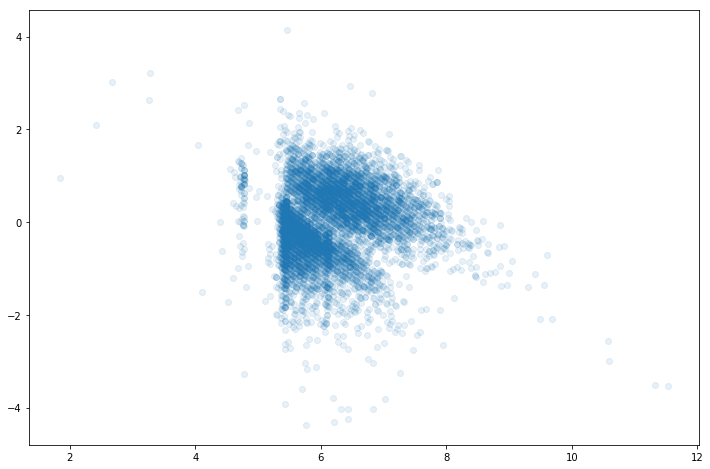

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid,alpha=0.1);

## Collect More Data

### Helper Functions to Collect Number of Ratings from Soups

In [ ]:
# def get_title(game):
#     title_string = game.find('title').text
#     title = title_string.split('|')[0].strip() 
#     return title

# def get_rating_num(game):
#     rating_num_string = game.find_all('div', class_='game-header-title-info')[1].text
#     if rating_num_string == None:
#         return None
    
#     rating_num = re.findall('\)(.*)(?=Ratings)',rating_num_string)[0].strip()

#     if "K" in rating_num:
#         if "." in rating_num:
#             rating_num = rating_num.replace('K', '00').replace('.', '')
#         else:
#             rating_num = rating_num.replace('K', '000')
#     return rating_num
        
# def get_game_info(game):
#     game_info = {"rating_num": get_rating_num(game)}
#     return game_info

# def get_all_games_info(games_data):
#     all_games_dict = {}
#     for index, html_source in enumerate(games_data):
#         game = BeautifulSoup(html_source, 'html.parser')
#         title = get_title(game)
#         try:
#             all_games_dict[title] = get_game_info(game)
#         except IndexError:
#             print(f"Error with {title}: regex not matched")
#         if index % 100 == 0:
#             print(f'Have scanned {index+1} out of {len(games_data)} records')
#     return all_games_dict

### Collect Number of Ratings and Convert to Dataframe

In [ ]:
# games_rating_nums = get_all_games_info(game_info_data)
# rating_num_df = pd.DataFrame(games_rating_nums).T
# rating_num_df

In [ ]:
# filepath ='/Users/tim/src/Metis/project_2/data/interim/rating_num.pkl'
# with open(filepath, 'wb') as pkl:
#     pickle.dump(games_rating_nums, pkl)

# filepath = '/Users/tim/src/Metis/project_2/data/interim/rating_num_df.pkl'
# with open(filepath, 'wb') as pkl:
#     pickle.dump(rating_num_df, pkl)

## Clean Dataframe Again

### Load in Dataframes

In [4]:
filepath = '/Users/tim/src/Metis/project_2/data/interim/all_games_df.pkl'
with open(filepath, 'rb') as pkl:
    all_games_df = pickle.load(pkl)

filepath = '/Users/tim/src/Metis/project_2/data/interim/rating_num_df.pkl'
with open(filepath, 'rb') as pkl:
    rating_num_df = pickle.load(pkl)

### Join Dataframes

In [5]:
df = all_games_df.join(rating_num_df)

### Inspect Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8590 entries, Dead Last to My First Rummikub
Data columns (total 12 columns):
awards          8590 non-null object
complexity      8587 non-null object
expansions      8586 non-null object
genre           8586 non-null object
list_price      2078 non-null object
player_max      8569 non-null object
player_min      8569 non-null object
playtime_max    8381 non-null object
playtime_min    8381 non-null object
rating          8587 non-null object
release_year    8503 non-null object
rating_num      8505 non-null object
dtypes: object(12)
memory usage: 1.2+ MB


### Clean rating_num Column

In [7]:
df['rating_num'] = df['rating_num'].str.extract('(\d+)$', expand=True)

### Convert Numerical Variables to Floats

In [8]:
df = df.infer_objects()
df['rating_num'] = df['rating_num'].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8590 entries, Dead Last to My First Rummikub
Data columns (total 12 columns):
awards          8590 non-null float64
complexity      8587 non-null float64
expansions      8586 non-null float64
genre           8586 non-null object
list_price      2078 non-null float64
player_max      8569 non-null float64
player_min      8569 non-null float64
playtime_max    8381 non-null float64
playtime_min    8381 non-null float64
rating          8587 non-null float64
release_year    8503 non-null float64
rating_num      8505 non-null float64
dtypes: float64(11), object(1)
memory usage: 1.2+ MB


In [9]:
df.describe()

,awards,complexity,expansions,list_price,player_max,player_min,playtime_max,playtime_min,rating,release_year,rating_num
count,8590.000000,8587.000000,8586.000000,2078.000000,8569.000000,8569.000000,8381.000000,8381.000000,8587.000000,8503.000000,8505.000000
mean,0.787078,1.962736,1.900652,41.725043,5.624810,2.053682,91.265720,70.656604,6.132060,2000.689404,1371.608701
std,2.283789,0.840092,9.427603,24.725625,9.152018,0.643986,741.667248,671.502404,1.080568,55.705128,4166.808804
min,0.000000,0.000000,0.000000,3.990000,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,8.000000
25%,0.000000,1.270000,0.000000,24.990000,4.000000,2.000000,30.000000,20.000000,5.400000,1998.000000,62.000000
50%,0.000000,1.840000,0.000000,39.950000,4.000000,2.000000,45.000000,40.000000,6.100000,2008.000000,262.000000
75%,1.000000,2.500000,1.000000,54.990000,6.000000,2.000000,90.000000,60.000000,7.000000,2014.000000,954.000000
max,51.000000,5.000000,433.000000,299.990000,362.000000,8.000000,60000.000000,60000.000000,9.600000,3000.000000,84000.000000


### Adjust Outliers

In [10]:
df.loc[df.player_max > 12, 'player_max'] = 12

df.loc[df.release_year < 1950, 'release_year'] = 1950
df.loc[df.release_year > 2019, 'release_year'] = 1950
df['years_released'] = 2019 - df['release_year']

### Filter Out Nulls and Unneeded Data

In [11]:
df_filtered = df[df.complexity > 0].drop(index = 'Scene It? Seinfeld').drop(['expansions', 'list_price'], axis = 1)
df_filtered = df_filtered[df.rating.notnull()].dropna()
df_filtered = df_filtered[df.rating_num >= 100]

df_filtered2 = df[df.complexity > 0].drop(index = 'Scene It? Seinfeld').drop(['expansions'], axis = 1)
df_filtered2 = df_filtered2[df.rating.notnull()].dropna()
df_filtered2 = df_filtered2[df.rating_num >= 100]

/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [12]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5537 entries, Dead Last to Overpower
Data columns (total 11 columns):
awards            5537 non-null float64
complexity        5537 non-null float64
genre             5537 non-null object
player_max        5537 non-null float64
player_min        5537 non-null float64
playtime_max      5537 non-null float64
playtime_min      5537 non-null float64
rating            5537 non-null float64
release_year      5537 non-null float64
rating_num        5537 non-null float64
years_released    5537 non-null float64
dtypes: float64(10), object(1)
memory usage: 519.1+ KB


In [13]:
df_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1989 entries, Dead Last to Architects of the West Kingdom
Data columns (total 12 columns):
awards            1989 non-null float64
complexity        1989 non-null float64
genre             1989 non-null object
list_price        1989 non-null float64
player_max        1989 non-null float64
player_min        1989 non-null float64
playtime_max      1989 non-null float64
playtime_min      1989 non-null float64
rating            1989 non-null float64
release_year      1989 non-null float64
rating_num        1989 non-null float64
years_released    1989 non-null float64
dtypes: float64(11), object(1)
memory usage: 202.0+ KB


## Feature Engineering

### Import Modules

In [197]:
import patsy
import pickle
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline

### Load DataFrames

In [198]:
filepath = '/Users/tim/src/Metis/project_2/data/interim/clean_df.pkl'
with open(filepath, 'rb') as pkl:
    df = pickle.load(pkl)

filepath = '/Users/tim/src/Metis/project_2/data/interim/clean_df_list_price.pkl'
with open(filepath, 'rb') as pkl:
    df2 = pickle.load(pkl)

### Get Dummy Variables for Genres

In [200]:
genres_df = pd.get_dummies(df_filtered['genre'].apply(pd.Series).stack()).sum(level=0)
genres_df

genres_df2 = pd.get_dummies(df_filtered2['genre'].apply(pd.Series).stack()).sum(level=0)
genres_df2

,Abstract,Children's,Customizable,Family,Party,Strategy,Thematic,Uncategorized,Wargames,Children's,Family,Party,Strategy,Thematic,Wargames
Dead Last,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Abandon Ship,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Great Western Trail,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
The Prince: The Struggle of House Borgia,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
China Rails,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Nightfall: Martial Law,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Heroes of Terrinoth,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Lignum (second edition),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Zombicide: Green Horde,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Dragonland,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Merge Dataframes

In [201]:
clean_df = df_filtered.join(genres_df)
clean_df

clean_df2 = df_filtered2.join(genres_df2)
clean_df2

,awards,complexity,genre,list_price,player_max,player_min,playtime_max,playtime_min,rating,release_year,...,Strategy,Thematic,Uncategorized,Wargames,Children's,Family,Party,Strategy,Thematic,Wargames
Dead Last,1.0,1.06,[Party],24.99,12.0,6.0,90.0,10.0,6.4,2016.0,...,0,0,0,0,0,0,0,0,0,0
Abandon Ship,1.0,1.22,[Family],34.99,7.0,3.0,30.0,30.0,6.3,2008.0,...,0,0,0,0,0,0,0,0,0,0
Great Western Trail,16.0,3.69,[Strategy],69.95,4.0,2.0,150.0,75.0,8.3,2016.0,...,1,0,0,0,0,0,0,0,0,0
The Prince: The Struggle of House Borgia,0.0,2.38,[Strategy],34.99,5.0,3.0,90.0,90.0,4.9,2003.0,...,1,0,0,0,0,0,0,0,0,0
China Rails,0.0,2.73,[Strategy],40.00,6.0,2.0,240.0,180.0,7.1,2007.0,...,1,0,0,0,0,0,0,0,0,0
Nightfall: Martial Law,0.0,2.73,[Strategy],39.99,5.0,2.0,45.0,45.0,7.0,2011.0,...,1,0,0,0,0,0,0,0,0,0
Heroes of Terrinoth,0.0,2.45,[Uncategorized],39.95,4.0,1.0,60.0,30.0,7.8,2018.0,...,0,0,1,0,0,0,0,0,0,0
Lignum (second edition),0.0,4.14,[Uncategorized],49.95,4.0,2.0,120.0,90.0,7.9,2017.0,...,0,0,1,0,0,0,0,0,0,0
Zombicide: Green Horde,0.0,2.58,[Thematic],99.99,6.0,1.0,60.0,60.0,8.0,2018.0,...,0,1,0,0,0,0,0,0,0,0
Dragonland,0.0,1.84,[Family],37.95,4.0,2.0,45.0,45.0,6.3,2002.0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
# filepath = '/Users/tim/src/Metis/project_2/data/interim/clean_df.pkl'
# with open(filepath, 'wb') as pkl:
#     pickle.dump(clean_df, pkl)

# filepath = '/Users/tim/src/Metis/project_2/data/interim/clean_df_list_price.pkl'
# with open(filepath, 'wb') as pkl:
#     pickle.dump(clean_df2, pkl)

### Clean Duplicate Columns

In [203]:
df.rename(index=str, columns={"Children's":"childrens1",
                              "\xa0  Children's":"childrens2",
                              "Uncategorized":"uncategorized",
                              "Abstract":"abstract",
                              "\xa0  Wargames":"wargames2",
                              "\xa0  Customizable":"customizable2",
                              "\xa0  Family":"family2",
                              "\xa0  Party":"party2",
                              "\xa0  Thematic":"thematic2",
                              "\xa0  Strategy":"strategy2"}, inplace=True)

df2.rename(columns={"Children's":"childrens1",
                              "\xa0  Children's":"childrens2",
                              "Uncategorized":"uncategorized",
                              "Abstract":"abstract",
                              "\xa0  Wargames":"wargames2",
                              "\xa0  Family":"family2",
                              "\xa0  Party":"party2",
                              "\xa0  Thematic":"thematic2",
                              "\xa0  Strategy":"strategy2"}, inplace=True)

### Combine Duplicate Columns

In [204]:
df['children'] = df['childrens1']+df['childrens2']
df['wargames'] = df['Wargames']+df['wargames2']
df['customizable'] = df['Customizable']+df['customizable2']
df['family'] = df['Family']+df['family2']
df['party'] = df['Party']+df['party2']
df['thematic'] = df['Thematic']+df['thematic2']
df['strategy'] = df['Strategy']+df['strategy2']

df2['children'] = df2['childrens1']+df2['childrens2']
df2['wargames'] = df2['Wargames']+df2['wargames2']
df2['family'] = df2['Family']+df2['family2']
df2['party'] = df2['Party']+df2['party2']
df2['thematic'] = df2['Thematic']+df2['thematic2']
df2['strategy'] = df2['Strategy']+df2['strategy2']

### Delete Duplicate Columns

In [205]:
df.drop(columns=['childrens1', 'childrens2', 'Wargames', 'wargames2', 'Customizable', 'customizable2',
                 'Family', 'family2', 'Party', 'party2', 'Thematic', 'thematic2', 'Strategy', 'strategy2'], inplace=True)

df2.drop(columns=['childrens1', 'childrens2', 'Wargames', 'wargames2', 'Customizable', 'Family', 'family2', 'Party', 'party2', 'Thematic', 'thematic2', 'Strategy', 'strategy2'], inplace=True)

### Create Log of Playtime Variables

In [206]:
df['playtime_min_log'] = np.log(df['playtime_min'])
df['playtime_max_log'] = np.log(df['playtime_max'])

### Create Polynomials

In [207]:
df['complexity2'] = df['complexity'] ** 2
df['years_released2'] = df['years_released'] ** 2

### Create Interations

In [208]:
df['playtime_log_diff'] = df['playtime_max_log'] - df['playtime_min_log']
#df2['playtime_log_diff'] = df2['playtime_max_log'] - df2['playtime_min_log']
#df['awards_per_year'] = df['awards']/ df['years_released']
#df2['awards_per_year'] = df2['awards']/ df2['years_released']


#df['playtime_diff'] = df['playtime_max'] - df['playtime_min']
#df['complex_player_max'] = df['complexity']/ df['player_max']
#df['complex2_player_max'] = df['complexity2']/ df['player_max']
#df['complex2_player_min'] = df['complexity2']/ df['player_min']
#df['complex_player_min'] = df['complexity']/ df['player_min']
#df['playtime_min_log_strategy'] = df['strategy']/ df['playtime_min_log']
#df['playtime_max_log_strategy'] = df['strategy']/ df['playtime_max_log']
#df['playtime_max_strategy'] = df['strategy']/ df['playtime_max']
#df['playtime_max_strategy'] = df['strategy']/ df['playtime_max']
#df['complex_playtime_max_log'] = df['playtime_max_log'] * df['complexity']
#df['complex_playtime_min_log'] = df['playtime_min_log'] * df['complexity']

## Re-Model

### Separate Features from Target and Scale

In [209]:
# Create feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('rating ~ awards + complexity + playtime_log_diff + player_min + years_released + children + strategy + thematic + uncategorized + wargames', data=df, return_type="dataframe")
#y2, X2 = patsy.dmatrices('rating ~ awards + complexity + playtime_log_diff + player_max + player_min + years_released + list_price + children + strategy + thematic + uncategorized + wargames', data=df2, return_type="dataframe")

X, y = np.array(X), np.array(y)
#X2, y2 = np.array(X2), np.array(y2)
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=13)
#X2, X2_test, y2, y2_test = train_test_split(X2, y2, test_size=.2, random_state=13)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)
#X2_train_scaled = scaler.fit_transform(X2)

X_test_scaled = scaler.transform(X_test)

### Cross-Validate

In [210]:
lr = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state = 22)
cross_val_score(lr, X_train_scaled, y, cv=kf, scoring='r2')
np.mean(cross_val_score(lr, X_train_scaled, y, cv=kf, scoring='r2'))

0.5660442565437631

### Predict

In [211]:
lr = LinearRegression()
fit2 = lr.fit(X_train_scaled,y)
y_pred = lr.predict(X_test_scaled)
lr.score(X_test_scaled,y_test)

0.567346080143408

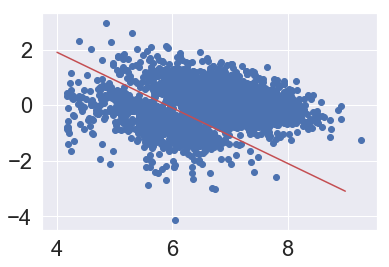

In [212]:
y_pred_train = lr.predict(X_train_scaled)
MYX=np.arange(4,10, 5)
MYY=-MYX + 5.9

err = y - y_pred_train
plt.scatter(y_pred_train, err)
plt.plot()
plt.plot(MYX, MYY, 'r')

mask_below = (err < (-y_pred_train + 5.9))

### Trying to Figure Out This Trend

In [213]:
# X_train_scaled[:5,:]

In [214]:
# X_train_df = pd.DataFrame(X_train_scaled, columns=['intercept', 'awards', 'complexity', 'playtime_log_diff', 'player_min', 'years_released', 'children', 'strategy', 'thematic', 'uncategorized',  'wargames'])
# X_train_df.loc[mask_below[:,0],:]


In [215]:
# features = ['awards', 'complexity', 'playtime_log_diff', 'player_min', 'years_released', 'children', 'strategy', 'thematic', 'uncategorized',  'wargames']
# features_df = df[features]
# features_df["intercept"] = 0
# scaled_data = scaler.transform(features_df)
# scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=[1].extend(features))


In [216]:
# scaled_df.columns = [1].extend(features)
# scaled_df.head()

In [217]:
# low_errors = scaled_df.merge(X_train_df.loc[mask_below[:,0],:])
# low_errors.head()

### Plots

In [220]:
features = ['awards', 'complexity', 'playtime_log_diff', 'player_min', 'years_released', 'children', 'strategy', 'thematic', 'uncategorized', 'wargames']
list(zip(features, fit2.coef_.reshape(-1)))
coef_df = pd.DataFrame(zip(features, fit2.coef_.reshape(-1)), )
coef_df.columns = ['Features', 'Coefficients']
sorted_df = coef_df.sort_values('Coefficients').reset_index(drop=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

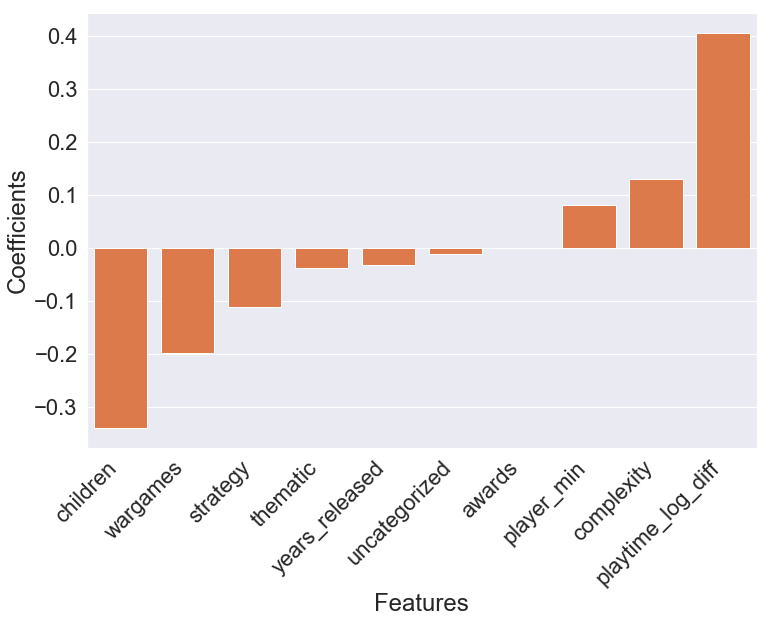

In [223]:
plt.figure(figsize=(12,8))
sns.barplot(x=sorted_df['Features'], y=sorted_df['Coefficients'], orient = 'v', color = '#f57133', errcolor = 'red')
sns.set(font_scale=2)
plt.xticks(rotation = 45, horizontalalignment="right")
#plt.xlabel('Prediction', size = 20, weight='bold')
#plt.ylabel('Error', size=20,  weight='bold')

In [161]:
pred_df = pd.DataFrame({'Actual': y_test.reshape(-1), 
                        'Predicted': y_pred.reshape(-1)})  
#pred_df

In [47]:
err = y_pred - y_test

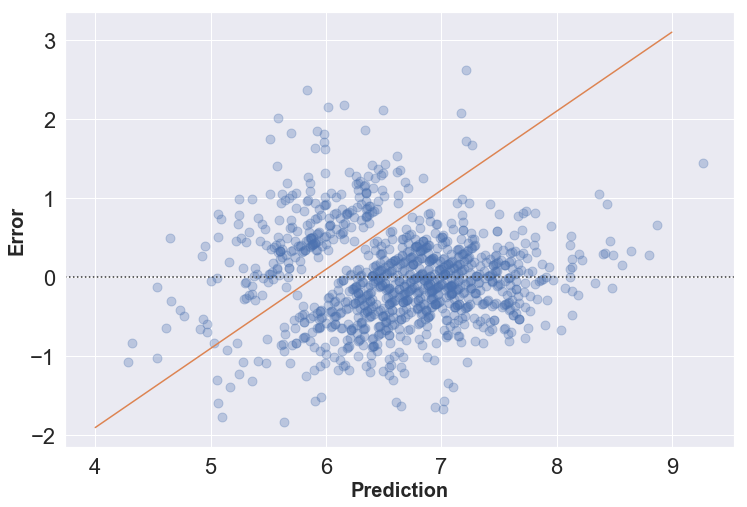

In [72]:
plt.figure(figsize=(12,8))
final_resid = sns.residplot(x=y_pred, y=err, scatter_kws={"s": 80, 'alpha':0.3})

MYX=np.arange(4,10, 5)
MYY=MYX - 5.9
sns.set(font_scale=2)
plt.xlabel('Prediction', size = 20, weight='bold')
plt.ylabel('Error', size=20,  weight='bold')
plt.plot(MYX, MYY)
final_resid_plot = final_resid.get_figure()  
final_resid_plot.savefig("final_resid_plot.png", format='png', bbox_inches='tight');

In [80]:
err

array([[-1.00948209],
       [ 0.08503069],
       [ 0.51841829],
       ...,
       [ 0.20112094],
       [-1.19115754],
       [ 0.90708177]])

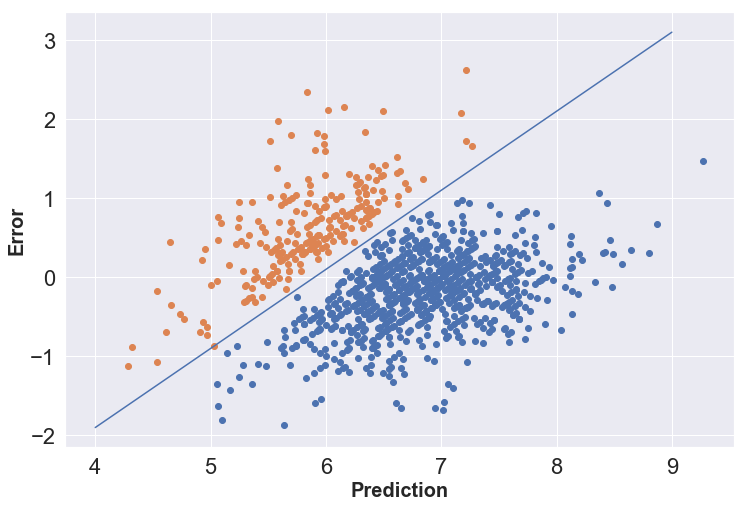

In [82]:
mask_below = (err < (y_pred - 5.9))
plt.figure(figsize=(12,8))
plt.scatter(x=y_pred[mask_below], y=err[mask_below])
plt.scatter(x=y_pred[~mask_below], y=err[~mask_below])

MYX=np.arange(4,10, 5)
MYY=MYX - 5.9
sns.set(font_scale=2)
plt.xlabel('Prediction', size = 20, weight='bold')
plt.ylabel('Error', size=20,  weight='bold')
plt.plot(MYX, MYY)

In [91]:
y_test.shape

(1108, 1)

### Checking for Multicollinearity

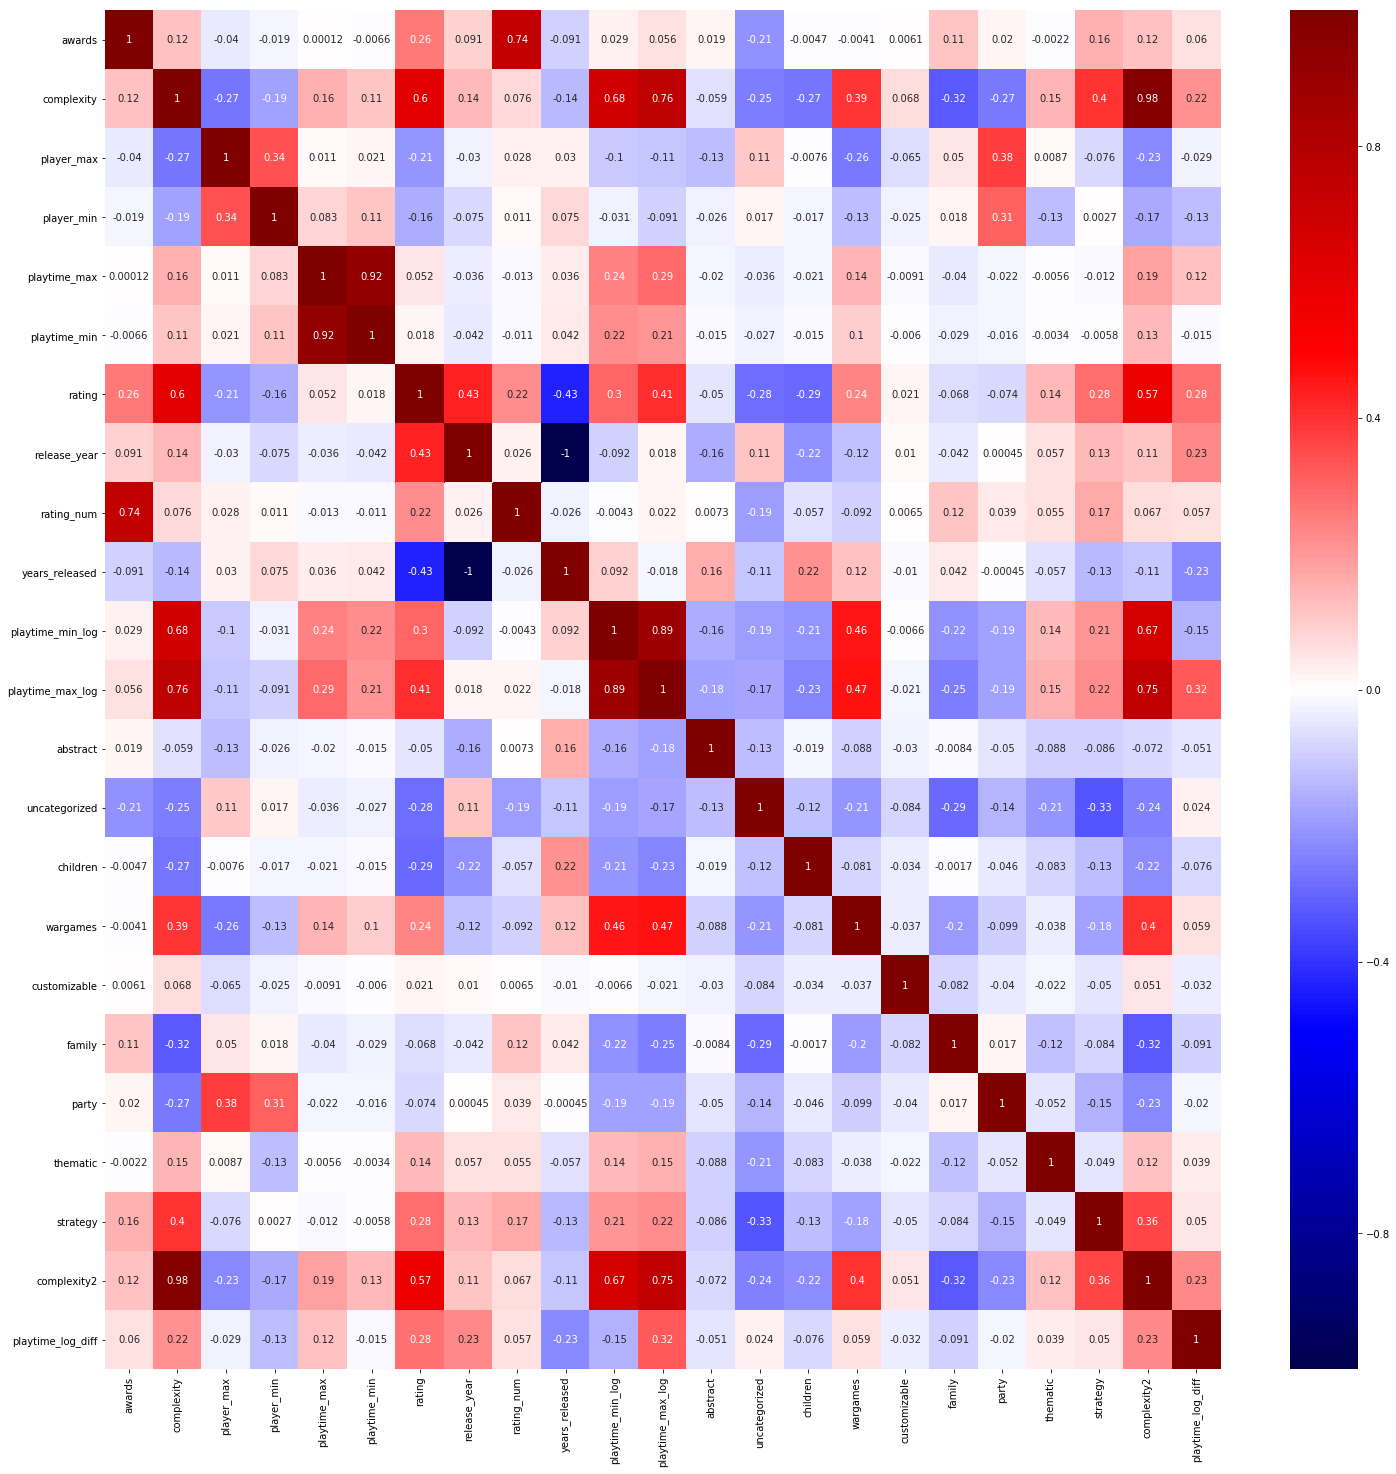

In [95]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [ ]:
plt.figure(figsize=(25,25))
sns.pairplot(df, height=3, aspect=3);